<a href="https://colab.research.google.com/github/othniel77/datascience/blob/main/data_cleaning_et_imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving divorce.csv to divorce.csv


In [ ]:
planes = pd.read_csv('/content/planes.csv')
print(planes.head())

       Airline Date_of_Journey    Source Destination                  Route  \
0  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
1       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
2       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   
3     SpiceJet      24/06/2019   Kolkata    Banglore              CCU → BLR   
4  Jet Airways      12/03/2019  Banglore   New Delhi        BLR → BOM → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops              Additional_Info  \
0    09:25  04:25 10 Jun      19h     2 stops                      No info   
1    18:05         23:30   5h 25m      1 stop                      No info   
2    16:50         21:35   4h 45m      1 stop                      No info   
3    09:00         11:25   2h 25m    non-stop                      No info   
4    18:55  10:25 13 Mar  15h 30m      1 stop  In-flight meal not included   

     Price  
0  13882.0  
1   6218.0  
2  13302.0  
3   

In [ ]:
planes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10660 entries, 0 to 10659
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10233 non-null  object 
 1   Date_of_Journey  10338 non-null  object 
 2   Source           10473 non-null  object 
 3   Destination      10313 non-null  object 
 4   Route            10404 non-null  object 
 5   Dep_Time         10400 non-null  object 
 6   Arrival_Time     10466 non-null  object 
 7   Duration         10446 non-null  object 
 8   Total_Stops      10448 non-null  object 
 9   Additional_Info  10071 non-null  object 
 10  Price            10044 non-null  float64
dtypes: float64(1), object(10)
memory usage: 916.2+ KB


##2.2.1 **Dealing with missing data**

In [ ]:
# Count the number of missing values in each column
print(planes.isna().sum())

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64


In [ ]:
# Find the five percent threshold
threshold = len(planes) * 0.05
# Create a filter
cols_to_drop = planes.columns[planes.isna().sum() <= threshold]

# Drop missing values for columns below the threshold
planes.dropna(subset=cols_to_drop, inplace=True)

print(planes.isna().sum())

Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64


By creating a missing values threshold and using it to filter columns, you've managed to remove missing values from all columns except for "Additional_Info" and "Price"

In [ ]:
# Check the values of the Additional_Info column
print(planes.value_counts(["Additional_Info"]))

Additional_Info             
No info                         6399
In-flight meal not included     1525
No check-in baggage included     258
1 Long layover                    14
Change airports                    7
No Info                            2
2 Long layover                     1
Business class                     1
Red-eye flight                     1
dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

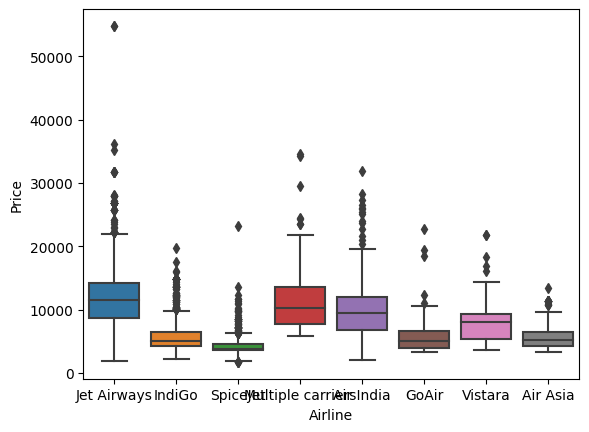

In [ ]:
# Create a box plot of Price by Airline
sns.boxplot(data=planes, x="Airline", y="Price")

plt.show()

### 2.2.2. **Imputing missing plane prices**

In [ ]:
# Calculate median plane ticket prices by Airline
airline_prices = planes.groupby("Airline")["Price"].median()

print(airline_prices)

Airline
Air Asia              5192.0
Air India             9443.0
GoAir                 5003.5
IndiGo                5054.0
Jet Airways          11507.0
Multiple carriers    10197.0
SpiceJet              3873.0
Vistara               8028.0
Name: Price, dtype: float64


In [ ]:
# Convert to a dictionary
prices_dict = airline_prices.to_dict()

# Map the dictionary to missing values of Price by Airline
planes["Price"] = planes["Price"].fillna(planes["Airline"].map(prices_dict))

# Check for missing values
print(planes.isna().sum())

Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price                0
dtype: int64


##  2.2.3. **Finding the number of unique values**

In [ ]:
# Filter the DataFrame for object columns
non_numeric = planes.select_dtypes("object")

# Loop through columns
for col in non_numeric.columns:

  # Print the number of unique values
  print(f"Number of unique values in {col} column: ", non_numeric[col].nunique())

Number of unique values in Airline column:  8
Number of unique values in Date_of_Journey column:  44
Number of unique values in Source column:  5
Number of unique values in Destination column:  6
Number of unique values in Route column:  122
Number of unique values in Dep_Time column:  218
Number of unique values in Arrival_Time column:  1220
Number of unique values in Duration column:  362
Number of unique values in Total_Stops column:  5
Number of unique values in Additional_Info column:  9


Interestingly, "Duration" is currently an object column whereas it should be a numeric column, and has 362 unique values! Let's find out more about this column.

### 2.2.4. **Flight duration categories**

In [ ]:
# Create a list of categories
flight_categories = ["Short-haul", "Medium","Long-haul"]
# Create short_flights
short_flights = "^0h|^1h|^2h|^3h|^4h"

# Create medium_flights
medium_flights = "^5h|^6h|^7h|^8h|^9h"

# Create long_flights
long_flights = "10h|11h|12h|13h|14h|15h|16h"


In [ ]:
import numpy as np

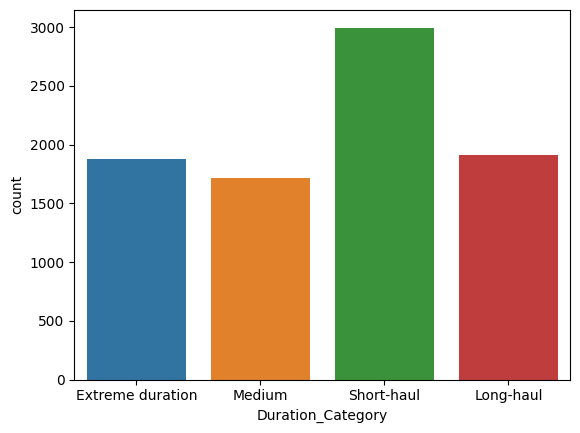

In [ ]:
# Create conditions for values in flight_categories to be created
conditions = [
    (planes["Duration"].str.contains(short_flights)),
    (planes["Duration"].str.contains(medium_flights)),
    (planes["Duration"].str.contains(long_flights))
]

# Apply the conditions list to the flight_categories
planes["Duration_Category"] = np.select(conditions,
                                        flight_categories,
                                        default="Extreme duration")

# Plot the counts of each category
sns.countplot(data=planes, x="Duration_Category")
plt.show()

It's clear that the majority of flights are short-haul, and virtually none are longer than 16 hours!

In [ ]:
# Preview the column
print(planes["Duration"].head())

0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object


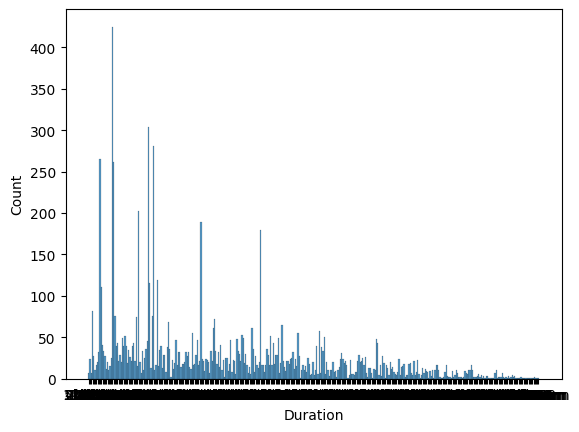

In [ ]:
# Remove the string character
#planes["Duration"] = planes["Duration"].str.replace("h","")


# Convert to float data type
#planes["Duration"] = planes["Duration"].astype(float)
# Plot a histogram
sns.histplot(data=planes,x='Duration')
plt.show()

## **Adding descriptive statistics : the use lambda**

In [ ]:
# Price standard deviation by Airline
planes["airline_price_st_dev"] = planes.groupby("Airline")["Price"].transform(lambda x: x.std())

print(planes[["Airline", "airline_price_st_dev"]].value_counts())

Airline            airline_price_st_dev
Jet Airways        4159.846432             3082
IndiGo             2245.529140             1632
Air India          3692.609285             1399
Multiple carriers  3558.323763              959
SpiceJet           1798.900648              653
Vistara            2888.915498              376
Air Asia           1979.826234              260
GoAir              2764.926625              147
dtype: int64


In [ ]:
# Median Duration by Airline
planes["airline_median_duration"] = planes.groupby("Airline")["Price"].transform(lambda x: x.median())

print(planes[["Airline","airline_median_duration"]].value_counts())

Airline            airline_median_duration
Jet Airways        11507.0                    3082
IndiGo             5054.0                     1632
Air India          9443.0                     1399
Multiple carriers  10197.0                     959
SpiceJet           3873.0                      653
Vistara            8028.0                      376
Air Asia           5192.0                      260
GoAir              5003.5                      147
dtype: int64


In [ ]:
# Mean Price by Destination
planes["price_destination_mean"] = planes.groupby("Destination")["Price"].transform(lambda x: x.mean())

print(planes[["Destination","price_destination_mean"]].value_counts())

Destination  price_destination_mean
Cochin       10473.585927              3631
Banglore     9093.622872               2291
Delhi        5248.541082                998
New Delhi    11579.306944               720
Hyderabad    5190.274021                562
Kolkata      4907.156863                306
dtype: int64


Looks like Jet Airways has the largest standard deviation in price, Air India has the largest median duration, and New Delhi, on average, is the most expensive destination.

## 2.2.4. **Identifying outliers**

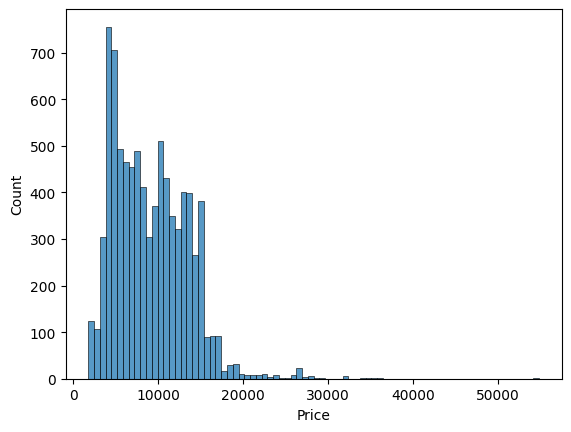

In [ ]:
# Plot a histogram of flight prices
sns.histplot(data=planes,x="Price")
plt.show()

In [ ]:
# Display descriptive statistics for flight duration
print(planes["Duration"].describe())

count       8508
unique       362
top       2h 50m
freq         425
Name: Duration, dtype: object


## 2.2.4. **Removing outliers**

In [ ]:
# Find the 75th and 25th percentiles
price_seventy_fifth = planes["Price"].quantile(0.75)
price_twenty_fifth = planes["Price"].quantile(0.25)

In [ ]:
# Find the 75th and 25th percentiles
price_upper_perc = planes["Price"].quantile(0.75)
price_lower_perc = planes["Price"].quantile(0.25)

# Calculate iqr
prices_iqr = price_upper_perc - price_lower_perc


In [ ]:
# Find the 75th and 25th percentiles
price_seventy_fifth = planes["Price"].quantile(0.75)
price_twenty_fifth = planes["Price"].quantile(0.25)

# Calculate iqr
prices_iqr = price_seventy_fifth - price_twenty_fifth

# Calculate the thresholds
upper = price_seventy_fifth + (1.5 * prices_iqr)
lower = price_twenty_fifth - (1.5 * prices_iqr)

In [ ]:
# Subset the data
planes = planes[(planes["Price"] > lower) & (planes["Price"] < upper)]

print(planes["Price"].describe())

count     8438.000000
mean      8877.466046
std       4001.838236
min       1759.000000
25%       5224.000000
50%       8372.000000
75%      12121.000000
max      22270.000000
Name: Price, dtype: float64


Originally the dataset had a maximum price of almost 55000, but the output of planes.describe() shows the maximum has been reduced to around 23000, reflecting a less skewed distribution for analysis!